<a href="https://colab.research.google.com/github/noah-scape/Machine-Learning-Assessment-Program/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 2.7402923389192382e-05


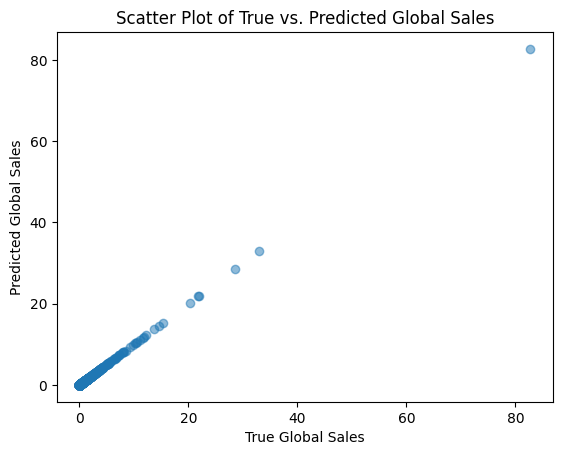

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the CSV data into a DataFrame
url = "/content/vgsales.csv"  # Replace with the URL of your CSV file
df = pd.read_csv(url)

# Select the features (independent variables) and the target variable (Global_Sales)
X = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values
y = df['Global_Sales'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Generate a scatter plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Scatter Plot of True vs. Predicted Global Sales")
plt.show()

Mean Squared Error: 0.08556106606813542


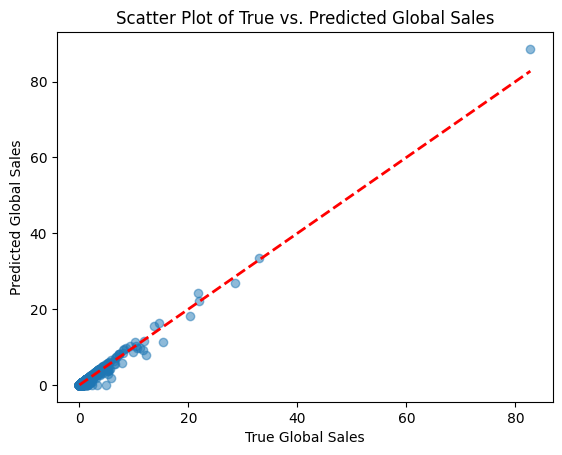

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

# Load the CSV data into a DataFrame
url = "https://raw.githubusercontent.com/noah-scape/Machine-Learning-Assessment-Program/main/vgsales.csv"  # Replace with the URL of your CSV file
df = pd.read_csv(url)

# Select the features (independent variables) and the target variable (Global_Sales)
X = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values
y = df['Global_Sales'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Select the top K features using feature selection
selector = SelectKBest(score_func=f_regression, k=3)
X_selected = selector.fit_transform(X_scaled, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Generate a scatter plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Scatter Plot of True vs. Predicted Global Sales")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Best Fit Line')
plt.show()